In [186]:
import tensorflow as tf
import pylab as plt
import numpy as np
from tqdm import tqdm
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')

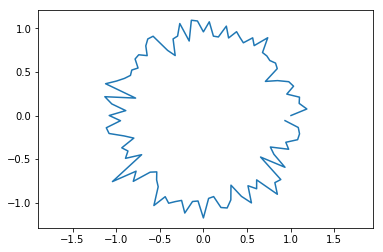

In [149]:
N = 100
theta = np.linspace(0, 2*np.pi, N+1)[:-1]

r = 1+np.random.normal(0,.1,size=(N,))
x = r*np.cos(theta)
y = r*np.sin(theta)

d = np.sqrt((x-np.roll(x,1))**2 + (y-np.roll(y,1))**2)


s = (r+np.roll(r,1)+d)/2
area = np.sum((np.sqrt(s*(s-r)*(s-np.roll(r,1))*(s-d))))
perimeter = np.sum(d)

area, perimeter
plt.plot(x,y)
plt.axis('equal')
plt.show()

In [220]:
theta = tf.linspace(0.0, 2*np.pi, N+1)[:-1]
r = 1 + tf.Variable(tf.random_normal([N,], 0, 0.1))

x = r*tf.cos(theta)
y = r*tf.sin(theta)

roll = tf.manip.roll

r2 = roll(r,-1,0)
x2 = roll(x,-1,0)
y2 = roll(y,-1,0)

d = tf.sqrt((x-x2)**2 + (y-y2)**2)
s = (r+r2+d)/2

area_chunks = tf.sqrt(s*(s-r)*(s-r2)*(s-d))
area = tf.reduce_sum(area_chunks)
perimeter = tf.reduce_sum(d)

In [221]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
sess.run([area, perimeter])

[3.1260467, 12.780053]

In [222]:
xg = tf.gradients(x,theta)[0]
yg = tf.gradients(y,theta)[0]

xgg = tf.gradients(xg,theta)[0]
ygg = tf.gradients(yg,theta)[0]

ku = tf.abs(xg*ygg + yg*xgg)
ku /= tf.pow(xg**2 + yg**2, 3/2.0)
mean_curvature = tf.reduce_sum(ku*d) 
#sess.run(mean_curvature)

In [239]:
area_loss = (area-1)**2
aw = tf.exp(-area_loss**2) * .001

loss = area_loss #+ perimeter*aw + aw*(tf.reduce_mean(x**2)+tf.reduce_mean(y**2))
loss += aw*(mean_curvature)**2
loss += aw*(tf.reduce_mean(x**2)+tf.reduce_mean(y**2))

#opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)
opt = tf.train.AdamOptimizer(learning_rate=0.01)
train_op = opt.minimize(loss)

In [240]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

result = []
for n in tqdm(range(5000)):
    _, lx, ax, px, kx = sess.run([train_op, loss, area, perimeter, mean_curvature])
    if n and n%1000==0:
        
        print(f"Area {ax:0.3f}, perimeter {px:0.3f} curvature {kx:0.4f} loss {lx:0.4f}")
        print(kx.mean())
    result.append(lx)

print(f"Area {ax:0.3f}, perimeter {px:0.3f} curvature {kx:0.4f} loss {lx:0.4f}")

 24%|██▍       | 1201/5000 [00:01<00:40, 93.38it/s]

Area 1.000, perimeter 3.573 curvature 4.0056 loss 0.0164
4.0055866


 43%|████▎     | 2144/5000 [00:01<00:04, 635.43it/s]

Area 1.000, perimeter 3.553 curvature 4.0018 loss 0.0163
4.001841


 65%|██████▍   | 3229/5000 [00:02<00:01, 1251.66it/s]

Area 1.000, perimeter 3.548 curvature 4.0011 loss 0.0163
4.0010834


 84%|████████▎ | 4180/5000 [00:03<00:00, 1359.56it/s]

Area 1.000, perimeter 3.548 curvature 4.0010 loss 0.0163
4.0010304


100%|██████████| 5000/5000 [00:04<00:00, 1239.31it/s]

Area 1.000, perimeter 3.548 curvature 4.0010 loss 0.0163


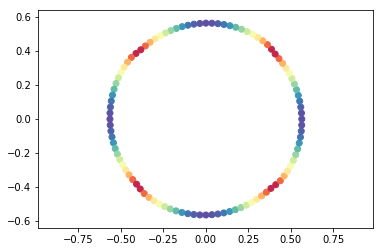

In [241]:
kx = sess.run(ku*d)
kx /= kx.max()
colors = [cmap(x) for x in kx]

rf = sess.run(r)
theta = np.linspace(0, 2*np.pi, N+1)[:-1]
xf = rf*np.cos(theta)
yf = rf*np.sin(theta)

plt.plot(xf,yf,'k',lw=1,alpha=0.25,zorder=-10)
plt.scatter(xf,yf,marker='o',color=colors)

plt.axis('equal')
plt.show()